# Clustering without target division
In this notebook I perform clustering on the adult dataset, without taking into consideration the target variable

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import category_encoders as ce
from pathlib import Path

In [2]:
np.random.seed(10)

In [3]:
import bz2
import pickle

def save_pickle_bz2(path: str, obj):
    """Saves a pickle file compressed in BZ2 format.

    Args:
        path (str): Path where to save object.
        obj (Any): Object to save.
    """
    with bz2.open(path, "wb") as f:
        pickle.dump(obj, f)
def load_pickle_bz2(path):
    """
    Loads data saved with save_pickle_bz2

    Args:
        path (str): Path where the data are located

    Returns:
        loaded object
    """
    with bz2.BZ2File(path) as f:
        data = pickle.load(f)
    return data

Path of the dataset, columns to consider

In [4]:
DATASET_PATH = Path("./adult.data")
DATASET_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' if not DATASET_PATH.exists() else DATASET_PATH
columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Target']
df = pd.read_csv(DATASET_PATH, names=columns, na_values=['?', ' ?', '? '])

Name of the folder where to save the outputs

In [5]:
OUTPUT_FILES_PATH = Path("adult_no_target_division")
OUTPUT_FILES_PATH.mkdir(exist_ok=True)

Cleaning the dataset: mapping the target to ${0 \text{ and } 1}$, dropping duplicates and lines with missing values, encoding the categorical features with a TargetEncoder

In [6]:
# strip the strings
df_str = df.select_dtypes(['object'])
df[df_str.columns] = df_str.apply(lambda x: x.str.strip())
# remove missing values and duplicates
df = df.dropna()
df = df.drop_duplicates()
# map the target into {0,1}
map_targ = {
        '<=50K': 0,
        '>50K': 1
}

feat = df.iloc[:, :-1]
targ = df.iloc[:, -1]
targ = targ.map(map_targ)

targenc = ce.TargetEncoder(verbose=1,return_df=True)
df = targenc.fit_transform(feat, targ)
df['Target'] = targ

In [7]:
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,39,0.268960,77516,0.421658,13,0.048399,0.133907,0.106689,0.263855,0.313955,2174,0,40,0.254411,0
1,50,0.285829,83311,0.421658,13,0.455011,0.485342,0.455728,0.263855,0.313955,0,0,13,0.254411,0
2,38,0.218918,215646,0.164328,9,0.107312,0.061527,0.106689,0.263855,0.313955,0,0,40,0.254411,0
3,53,0.218918,234721,0.056298,7,0.455011,0.061527,0.455728,0.129972,0.313955,0,0,40,0.254411,0
4,28,0.218918,338409,0.421658,13,0.455011,0.448686,0.493599,0.129972,0.113783,0,0,40,0.271739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0.218918,257302,0.253968,12,0.455011,0.305159,0.493599,0.263855,0.113783,0,0,38,0.254411,0
32557,40,0.218918,154374,0.164328,9,0.455011,0.124236,0.455728,0.263855,0.313955,0,0,40,0.254411,1
32558,58,0.218918,151910,0.164328,9,0.096735,0.133907,0.066334,0.263855,0.113783,0,0,40,0.254411,0
32559,22,0.218918,201490,0.164328,9,0.048399,0.133907,0.014343,0.263855,0.313955,0,0,20,0.254411,0


In [8]:
df['Target'].value_counts()

0    22633
1     7506
Name: Target, dtype: int64

# Features preparation

Extract the numerical features and scale them using the StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
NUMERICAL_FEATURES = ['Age', 'Fnlwgt', 'Education-num', 'Capital-gain', 'Capital-loss', 'Hours-per-week']

df_numerical = df[NUMERICAL_FEATURES + ['Target']].copy()

# Scale the numerical features
scaler = StandardScaler()
df_numerical[NUMERICAL_FEATURES] = scaler.fit_transform(df_numerical[NUMERICAL_FEATURES])

In [11]:
df_numerical

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Target
0,0.042516,-1.062676,1.128996,0.145925,-0.218673,-0.078031,0
1,0.880215,-1.007829,1.128996,-0.147502,-0.218673,-2.332060,0
2,-0.033639,0.244669,-0.440434,-0.147502,-0.218673,-0.078031,0
3,1.108678,0.425206,-1.225149,-0.147502,-0.218673,-0.078031,0
4,-0.795183,1.406572,1.128996,-0.147502,-0.218673,-0.078031,0
...,...,...,...,...,...,...,...
32556,-0.871338,0.638926,0.736639,-0.147502,-0.218673,-0.244996,0
32557,0.118670,-0.335246,-0.440434,-0.147502,-0.218673,-0.078031,1
32558,1.489450,-0.358567,-0.440434,-0.147502,-0.218673,-0.078031,0
32559,-1.252110,0.110688,-0.440434,-0.147502,-0.218673,-1.747682,0


# Clustering
Start of the clustering using K-Means. I try the values of K between 2 and 12

In [12]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from kneed import KneeLocator

In [13]:
CLUSTERS = [*range(2, 12)]

Utility functions

In [14]:
def print_metrics(X, kmeans):
    """print the metrics of the kmeans model.
    Parameters
    ----------
        X - normalized dataset
        kmeans - model.
    Prints
    ------
        K
        SSE
        Silhouette score
        Separation
    
    """
    print(f'K={len(kmeans.cluster_centers_)}')
    print('\tSSE:\t\t{}'.format(kmeans.inertia_))
    print('\tSilhouette:\t\t{}'.format(metrics.silhouette_score(X, kmeans.labels_)))
    print('\tDaviesBouldin score:\t\t{}'.format(metrics.davies_bouldin_score(X, kmeans.labels_)))

def run_kmeans(X, range_nclusters=CLUSTERS):
    '''runs kmeans for different values of k'''
    inertia, models = [], []
    for k in range_nclusters:
        k_means = KMeans(init='k-means++', n_clusters= k, n_init=20, random_state=123)
        model = k_means.fit(X) #returns fitted estimator
        models.append(model)
        inertia.append(k_means.inertia_)
    return inertia, models

def plot_silouette(data, models):
    """
    models - list of already fit kmeans models
    """
    fig, axs = plt.subplots(ncols=len(models), figsize=(15,5), sharex=True, sharey=True)
    for i,model in enumerate(models):
        nclusters = model.n_clusters
        axs[i].set_xlim([-0.1, 1])
        axs[i].set_ylim([0, len(data) + (nclusters + 1) * 10])
        axs[i].set_title(f"$K={nclusters}$")
        
        clusters = model.predict(data)
        silhouette_avg = silhouette_score(data, clusters)
        
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(data, clusters)
        
        y_lower = 10
        for j in range(nclusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[clusters == j]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(j) / nclusters)
            axs[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            axs[i].text(-0.05, y_lower + 0.5 * size_cluster_i, str(j))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        
        # The vertical line for average silhouette score of all the values
        axs[i].axvline(x=silhouette_avg, color="red", linestyle="--")

        axs[i].set_yticks([])  # Clear the yaxis labels / ticks
        axs[i].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        
    plt.tight_layout()

In [16]:
df_copy = df_numerical.copy()

Run K means with different values of k, returns the SSE and the fitted kmeans models

In [17]:
wcss, models = run_kmeans(df_copy[NUMERICAL_FEATURES])

Plot the siluette score

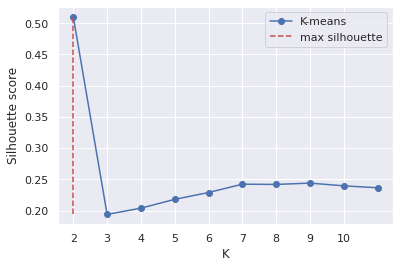

In [18]:
sil_score = []
for m in models:
    sil_score.append(silhouette_score(df_copy[NUMERICAL_FEATURES], m.labels_))
    
plt.plot(CLUSTERS, sil_score, 'bo-', label="K-means")
plt.vlines(np.argmax(sil_score) + 2, min(sil_score), max(sil_score), 'r', '--', label="max silhouette")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.xticks(range(2, 11))
plt.ylabel("Silhouette score")
plt.legend()
plt.show()

Plot the elbow

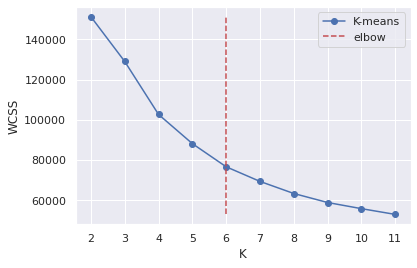

In [19]:
kl = KneeLocator(CLUSTERS, wcss, curve="convex", direction="decreasing")
plt.plot(CLUSTERS, wcss, 'o-', label="K-means")
plt.vlines(kl.elbow, min(wcss), max(wcss), 'r', '--', label="elbow")
plt.xticks(CLUSTERS)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.legend()
plt.show()

In [20]:
df_copy

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Target
0,0.042516,-1.062676,1.128996,0.145925,-0.218673,-0.078031,0
1,0.880215,-1.007829,1.128996,-0.147502,-0.218673,-2.332060,0
2,-0.033639,0.244669,-0.440434,-0.147502,-0.218673,-0.078031,0
3,1.108678,0.425206,-1.225149,-0.147502,-0.218673,-0.078031,0
4,-0.795183,1.406572,1.128996,-0.147502,-0.218673,-0.078031,0
...,...,...,...,...,...,...,...
32556,-0.871338,0.638926,0.736639,-0.147502,-0.218673,-0.244996,0
32557,0.118670,-0.335246,-0.440434,-0.147502,-0.218673,-0.078031,1
32558,1.489450,-0.358567,-0.440434,-0.147502,-0.218673,-0.078031,0
32559,-1.252110,0.110688,-0.440434,-0.147502,-0.218673,-1.747682,0


Silouette plots

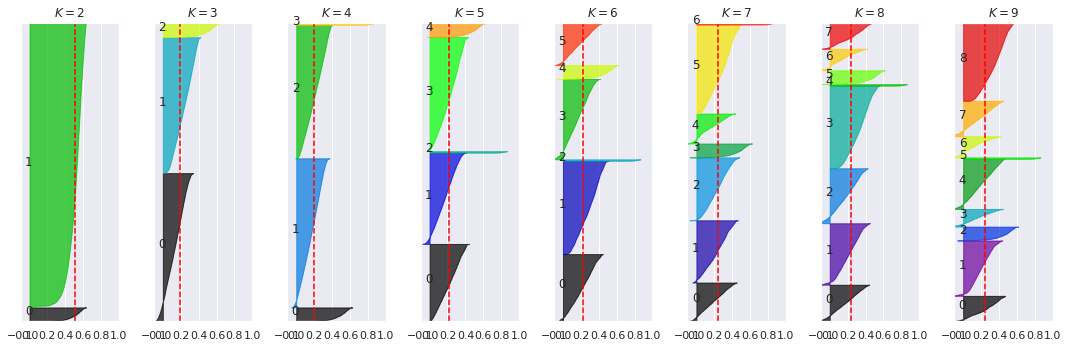

In [21]:
plot_silouette(df_copy[NUMERICAL_FEATURES], models[0:8])

Create the paths where to store the results: adult_no_target_division/K{2..6}

In [22]:
K_PATHS = []
for i, m in enumerate(models[:5], start=2):
    d = OUTPUT_FILES_PATH / f"K{i}"
    d.mkdir(exist_ok=True)
    K_PATHS.append(d)
    # store the trained k-means model
    save_pickle_bz2(d / f"kmeans_k{i}.bz2", m)

In [23]:
(df_copy == df_numerical).all().all()

True

Putting the scaled version of the numerical features inside df

In [24]:
df[NUMERICAL_FEATURES] = df_numerical[NUMERICAL_FEATURES]
df

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target
0,0.042516,0.268960,-1.062676,0.421658,1.128996,0.048399,0.133907,0.106689,0.263855,0.313955,0.145925,-0.218673,-0.078031,0.254411,0
1,0.880215,0.285829,-1.007829,0.421658,1.128996,0.455011,0.485342,0.455728,0.263855,0.313955,-0.147502,-0.218673,-2.332060,0.254411,0
2,-0.033639,0.218918,0.244669,0.164328,-0.440434,0.107312,0.061527,0.106689,0.263855,0.313955,-0.147502,-0.218673,-0.078031,0.254411,0
3,1.108678,0.218918,0.425206,0.056298,-1.225149,0.455011,0.061527,0.455728,0.129972,0.313955,-0.147502,-0.218673,-0.078031,0.254411,0
4,-0.795183,0.218918,1.406572,0.421658,1.128996,0.455011,0.448686,0.493599,0.129972,0.113783,-0.147502,-0.218673,-0.078031,0.271739,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.871338,0.218918,0.638926,0.253968,0.736639,0.455011,0.305159,0.493599,0.263855,0.113783,-0.147502,-0.218673,-0.244996,0.254411,0
32557,0.118670,0.218918,-0.335246,0.164328,-0.440434,0.455011,0.124236,0.455728,0.263855,0.313955,-0.147502,-0.218673,-0.078031,0.254411,1
32558,1.489450,0.218918,-0.358567,0.164328,-0.440434,0.096735,0.133907,0.066334,0.263855,0.113783,-0.147502,-0.218673,-0.078031,0.254411,0
32559,-1.252110,0.218918,0.110688,0.164328,-0.440434,0.048399,0.133907,0.014343,0.263855,0.313955,-0.147502,-0.218673,-1.747682,0.254411,0


Saving kmeans models, adult with clusters and centroids and printing the target distribution inside the clusters

In [25]:
for k, (m, p) in enumerate(zip(models[:5], K_PATHS), start=2):
    centroids = m.cluster_centers_
    dfk = df.copy()
    dfk['Cluster'] = m.predict(df[NUMERICAL_FEATURES])
    np.savez(p / f"centroids_k{k}", centroids=centroids)
    dfk.to_csv(p / f"adult_full_k{k}.csv")
    
    print(f"K={k}")
    print("_____")
    for (i, g) in dfk.groupby(['Cluster']):
        print(f"Cluster {i}")
        print(g['Target'].value_counts())
        print("*"*40)
    

K=2
_____
Cluster 0
1    735
0    659
Name: Target, dtype: int64
****************************************
Cluster 1
0    21974
1     6771
Name: Target, dtype: int64
****************************************
K=3
_____
Cluster 0
0    9408
1    5588
Name: Target, dtype: int64
****************************************
Cluster 1
0    12566
1     1183
Name: Target, dtype: int64
****************************************
Cluster 2
1    735
0    659
Name: Target, dtype: int64
****************************************
K=4
_____
Cluster 0
1    735
0    659
Name: Target, dtype: int64
****************************************
Cluster 1
0    9673
1    5421
Name: Target, dtype: int64
****************************************
Cluster 2
0    12301
1     1202
Name: Target, dtype: int64
****************************************
Cluster 3
1    148
Name: Target, dtype: int64
****************************************
K=5
_____
Cluster 0
0    6039
1    1784
Name: Target, dtype: int64
********************************

# Genarating the train / test / validation and centroids-neighbors sets
Generate the sets for the Random Forest creation, and the set containing the clusters best representatives

In [36]:
from sklearn.model_selection import train_test_split

In [45]:
from sklearn.metrics import pairwise_distances

def find_nearest_neighbors(df: pd.DataFrame, centroids, k, columns_to_consider=NUMERICAL_FEATURES, cluster_col='Cluster', group_by=['Cluster']):
    """
    
    """
    assert len(columns_to_consider) == len(centroids[0])
    # indices of the elements to put in the final dataframe
    clustered_ind = []
    for (_, cluster), cent in zip(df.groupby(group_by), centroids):
        print(cluster[cluster_col].value_counts())
        print(f"Centroid: {cent}")
        features = cluster[columns_to_consider].copy()
        distances = pairwise_distances(features, [cent])
        features['Dist'] = distances
        # sort by distance and get the first k rows
        sorted_f = features.sort_values(by=['Dist']).head(k)
        clustered_ind += sorted_f.index.to_list()
    return df.loc[clustered_ind]

In [65]:
cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Target', 'Cluster']
for k, p in enumerate(K_PATHS, start=2):
    df_ = pd.read_csv(p / f"adult_full_k{k}.csv")[cols]
    train_test, validation = train_test_split(df_, train_size=0.8, stratify=df_['Cluster'], random_state=123)
    train, test = train_test_split(train_test, train_size=0.7, stratify=train_test['Cluster'], random_state=123)
    train.to_csv(p / f"train_k{k}.csv")
    test.to_csv(p / f"test_k{k}.csv")
    validation.to_csv(p / f"validation_k{k}.csv")
    # generating the dataset of centroids' nearest neighbors
    centroids = np.load(p / f"centroids_k{k}.npz", allow_pickle=True)['centroids']
    elements_per_cluster = int(np.ceil(40 / k))
    train_clusters = find_nearest_neighbors(train, centroids, elements_per_cluster)
    train_clusters.to_csv(p / f"train_cluster_k{k}.csv")

0    780
Name: Cluster, dtype: int64
Centroid: [ 0.23940263 -0.0394545   0.34850295 -0.14750209  4.47416552  0.22433831]
1    16097
Name: Cluster, dtype: int64
Centroid: [-0.01160992  0.00191336 -0.01690079  0.00715317 -0.2169764  -0.01087937]
0    8398
Name: Cluster, dtype: int64
Centroid: [ 0.58327353 -0.30692263  0.34409804  0.1241719  -0.21645613  0.32701105]
1    7699
Name: Cluster, dtype: int64
Centroid: [-0.66162491  0.33937109 -0.4113556  -0.12071041 -0.21754489 -0.3800842 ]
2    780
Name: Cluster, dtype: int64
Centroid: [ 0.23940263 -0.0394545   0.34850295 -0.14750209  4.47416552  0.22433831]
0    781
Name: Cluster, dtype: int64
Centroid: [ 0.23940263 -0.0394545   0.34850295 -0.14750209  4.47416552  0.22433831]
1    8452
Name: Cluster, dtype: int64
Centroid: [ 0.60955985 -0.30354973  0.28159023 -0.01340977 -0.21646613  0.30509572]
2    7561
Name: Cluster, dtype: int64
Centroid: [-0.71088976  0.34221123 -0.36225264 -0.11597089 -0.21752686 -0.37188118]
3    83
Name: Cluster, dty

$40$ elements in total for k = 2

# Creating the Random Forests for K=$6$

In [66]:
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

In [67]:
# Hyperparameters of the grid search
__HYPERPARAMETERS = {
    "bootstrap": [True, False],
    "max_depth": [100, 350, 500],
    "max_features": ["auto", "sqrt"],
    "min_samples_leaf": [10, 20, 50],
    "min_samples_split": [5, 10, 50],
    "n_estimators": [100, 150, 350, 500],
    "criterion": ["gini", "entropy"],
}

def create_random_forest(
        x,
        y,
        hyperparameters=__HYPERPARAMETERS,
        n_jobs=12
) -> RandomForestClassifier:
    """Creates a random forest classifier via grid search.

    Args:
        x (ndarray): Training input examples.
        y (ndarray): Training target values.
        hyperparameters (Dict[str, List[Any]], optional): Dictionary of hyperparameters for the grid search. Defaults to the fixed ones.
        n_jobs: Number of jobs to run in parallel in the grid search. (default 4)

    Returns:
        RandomForestClassifier: Random forest classifier.
    """

    rf = RandomForestClassifier()
    clf = HalvingGridSearchCV(rf, hyperparameters, refit=True, n_jobs=n_jobs, verbose=1)
    clf.fit(x, y)
    return clf.best_estimator_

In [80]:
cols = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Target', 'Cluster']
BASE_PATH = Path("adult_no_target_division/K6")
TRAIN = pd.read_csv( BASE_PATH / "train_k6.csv")[cols]
TEST  = pd.read_csv(BASE_PATH / "test_k6.csv")[cols]

X_train = TRAIN[cols[:-2]].to_numpy()
y_train = TRAIN['Target'].to_numpy()

X_test = TEST[cols[:-2]].to_numpy()
y_test = TEST['Target'].to_numpy()

In [81]:
rf = create_random_forest(X_train, y_train)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 23
max_resources_: 16877
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 864
n_resources: 23
Fitting 5 folds for each of 864 candidates, totalling 4320 fits
----------
iter: 1
n_candidates: 288
n_resources: 69
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
----------
iter: 2
n_candidates: 96
n_resources: 207
Fitting 5 folds for each of 96 candidates, totalling 480 fits
----------
iter: 3
n_candidates: 32
n_resources: 621
Fitting 5 folds for each of 32 candidates, totalling 160 fits
----------
iter: 4
n_candidates: 11
n_resources: 1863
Fitting 5 folds for each of 11 candidates, totalling 55 fits
----------
iter: 5
n_candidates: 4
n_resources: 5589
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 16767
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5440
           1       0.79      0.61      0.69      1794

    accuracy                           0.86      7234
   macro avg       0.83      0.78      0.80      7234
weighted avg       0.86      0.86      0.86      7234



Saving the random forest for the datasets with k = 6

In [85]:
save_pickle_bz2(BASE_PATH / "adult_randfor_k6.bz2", rf)

In [86]:
TRAIN_CLUSTER = pd.read_csv(BASE_PATH / "train_cluster_k6.csv")[cols]

In [87]:
TRAIN_CLUSTER

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Target,Cluster
0,1.108678,0.218918,-0.291529,0.164328,-0.440434,0.096735,0.124236,0.066334,0.129972,0.113783,-0.147502,-0.218673,-0.244996,0.254411,0,0
1,1.184832,0.218918,-0.325459,0.164328,-0.440434,0.096735,0.061527,0.066334,0.263855,0.113783,-0.147502,-0.218673,-0.078031,0.254411,0,0
2,1.032523,0.218918,-0.291529,0.164328,-0.440434,0.107312,0.041134,0.039370,0.129972,0.113783,-0.147502,-0.218673,-0.244996,0.254411,0,0
3,1.184832,0.285829,-0.199438,0.164328,-0.440434,0.455011,0.270647,0.455728,0.263855,0.313955,-0.147502,-0.218673,-0.078031,0.254411,0,0
4,1.108678,0.218918,-0.214137,0.164328,-0.440434,0.096735,0.124236,0.106689,0.129972,0.113783,-0.147502,-0.218673,-0.078031,0.254411,0,0
5,1.108678,0.218918,-0.209584,0.164328,-0.440434,0.455011,0.225590,0.455728,0.263855,0.313955,-0.147502,-0.218673,-0.078031,0.254411,1,0
6,1.108678,0.218918,-0.347758,0.164328,-0.440434,0.455011,0.225590,0.455728,0.263855,0.313955,-0.147502,-0.218673,-0.078031,0.254411,1,0
7,-0.719029,0.218918,-0.298864,0.164328,-0.440434,0.048399,0.116515,0.066334,0.263855,0.313955,-0.147502,-0.218673,-0.495444,0.254411,0,1
8,-0.871338,0.218918,-0.407697,0.164328,-0.440434,0.107312,0.270647,0.014343,0.263855,0.113783,-0.147502,-0.218673,-0.495444,0.254411,0,1
9,-0.871338,0.218918,-0.282973,0.164328,-0.440434,0.048399,0.485342,0.106689,0.129972,0.113783,-0.147502,-0.218673,-0.328479,0.254411,0,1


In [89]:
x_test_clustered = TRAIN_CLUSTER[cols[:-2]].to_numpy()
y_test_clustered = TRAIN_CLUSTER['Target'].to_numpy()

Saving the data for k=6

In [90]:
np.savez(BASE_PATH / "adult_randfor_k6_data", x_train=X_train, x_test=X_test, y_train=y_train, y_test=y_test, x_test_clustered=x_test_clustered, y_test_clustered=y_test_clustered)